# Laboratorium 6: Adversarial attacks

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input
import random
import cv2
import os

### Ładowanie Modelu

In [2]:
model = tf.keras.models.load_model("signs_model.h5")

### Ładowanie obrazków oraz klas

In [3]:
dir = "limit20"
samples = []
labels = []

for image_name in os.listdir(dir):
    if image_name.endswith('jpg'):
        image = cv2.imread(f"{dir}/{image_name}")
        image = cv2.resize(image, (64,64))
        samples.append(image)
        labels.append(image_name)

samples = np.array(samples)


In [4]:
import pandas as pd
classes = pd.read_csv('signs_labels.csv')
classes.loc[0][1]

'Speed limit (20km/h)'

## Klasyfikacja i wizualizacja wyników

In [5]:
pred = model.predict(samples)
print(pred.shape)
for i in range(len(samples)):
    max = pred[i].argmax()

(100, 43)


(100, 43)


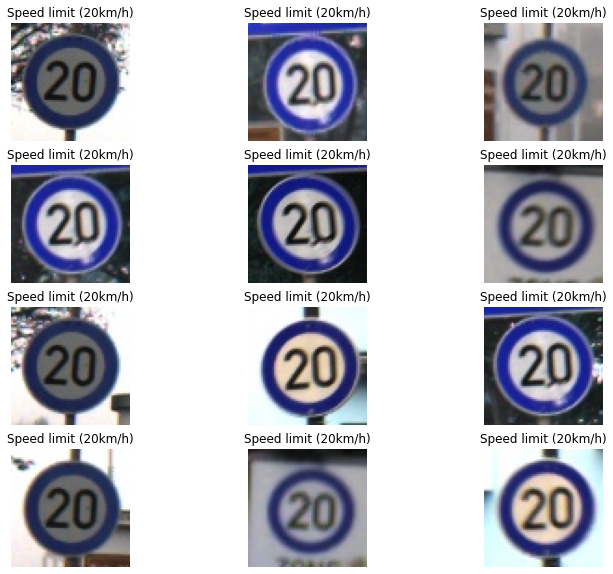

In [6]:
plt.figure(figsize=(12, 10))
pred = model.predict(samples)
print(pred.shape)
for i in range(12):
    n = random.randrange(len(samples))
    plt.subplot(4, 3, i + 1)
    plt.imshow(samples[n])
    max = pred[n].argmax()
    plt.title(classes.loc[max][1])
    plt.axis("off")

### Jedna iteracja algorytmu uczącego

In [7]:
lossFunct = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.1)
target_class = 14
def do_step(image,delta,real_class):
    with tf.GradientTape() as tape:
        tape.watch(delta)
        adversary = baseImage + delta
        predictions = model(adversary, training=False)
  
        originalLoss = lossFunct(tf.convert_to_tensor([real_class]),predictions)
        targetLoss = lossFunct(tf.convert_to_tensor([target_class]),predictions)
        loss = targetLoss - originalLoss
    gradients = tape.gradient(loss, delta)
    #optimizer.apply_gradients([(gradients, delta)])
    #delta.assign_add(delta)

    optimizer.apply_gradients([(gradients, delta)])
    clipped_delta = tf.clip_by_value(delta, clip_value_min = -0.02, clip_value_max = 0.02)
    delta.assign_add(clipped_delta)
    
    return delta,loss

### Wizualizacja

In [8]:
def show_step(delta,loss, real_prediction):  
    print("step: {}, loss: {}...".format(step, loss.numpy()))
    adverImage = (baseImage + delta).numpy().squeeze()
    adverImage = np.clip(adverImage, 0, 255).astype("uint8")
    adverImage = np.expand_dims(adverImage, axis=0)
    predictions = model.predict(adverImage)
    
    #real
    max = real_prediction.argmax()
    real_pred = real_prediction.max()
    real_label =  classes.loc[max][1] 
    
    #adv
    max = predictions.argmax() #Zwraca indeksy maksymalnych wartości wzdłuż osi.
    adv_pred = predictions.max()
    adv_label =  classes.loc[max][1] 
    
    fig=plt.figure(figsize=(12,8))
    ax = plt.subplot(1, 3, 1)
    plt.title(f"Original {real_label}:{100*real_pred:.2f}%")
    plt.imshow(image.squeeze())
    plt.axis("off")  
    
    ax = plt.subplot(1, 3, 2)
    plt.title("Delta")
    plt.imshow(np.clip((delta.numpy().squeeze()*256).astype("uint8"), 0, 255))
    plt.axis("off")  
    
    ax = plt.subplot(1, 3, 3)  
    plt.title(f"Adversary {adv_label}:{100*adv_pred:.2f}%")
    plt.imshow(adverImage.squeeze())
    plt.axis("off")  
    plt.show() 
    
    return max

### Adversarial attacks

*** 0 ***
step: 50, loss: 16.197643280029297...


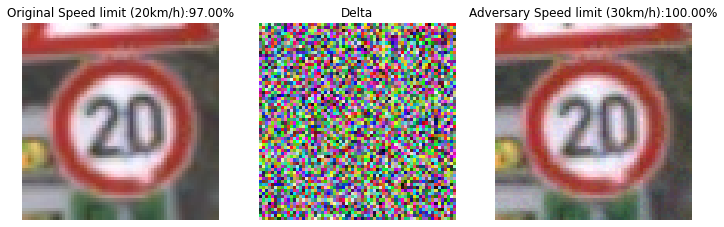

1
*** 1 ***
step: 50, loss: 18.935705184936523...


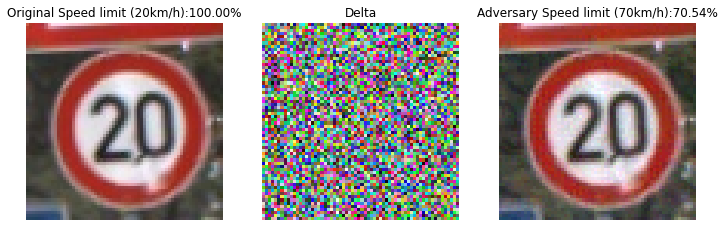

4
*** 2 ***
step: 50, loss: 4.86503791809082...


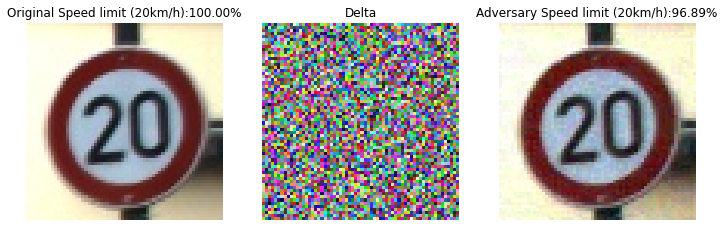

0
*** 3 ***
step: 50, loss: -14.618669509887695...


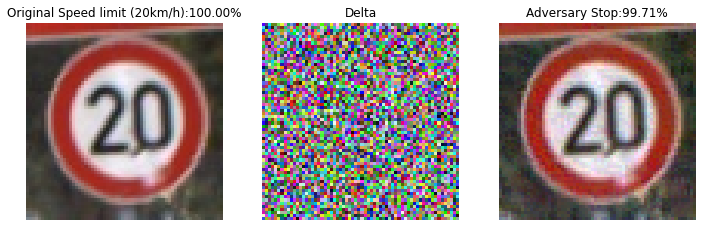

14
*** 4 ***
step: 50, loss: -1.5579575300216675...


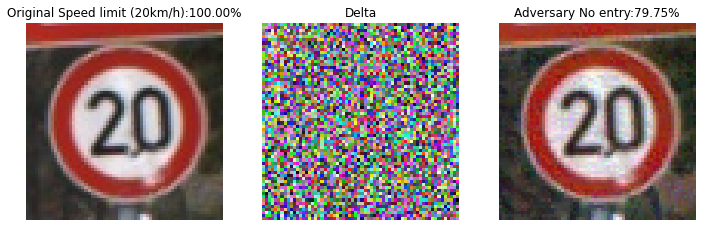

17
*** 5 ***
step: 50, loss: -17.10799789428711...


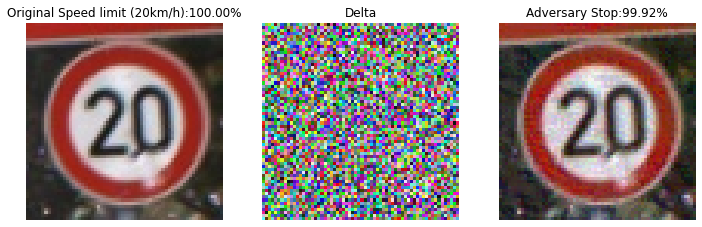

14
*** 6 ***
step: 50, loss: -27.309240341186523...


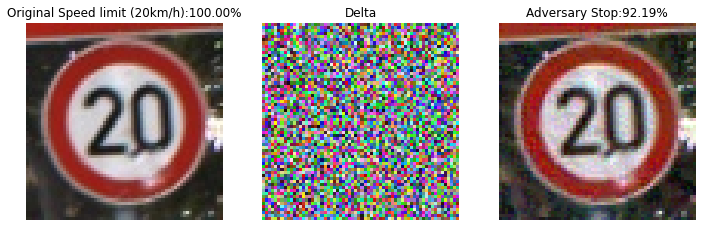

14
*** 7 ***
step: 50, loss: -21.228857040405273...


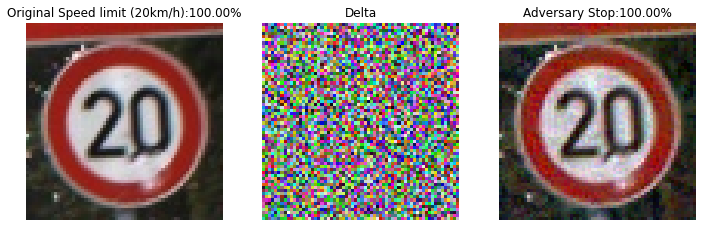

14
*** 8 ***
step: 50, loss: -23.91498565673828...


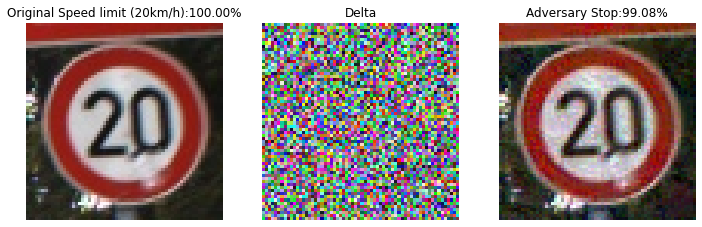

14
*** 9 ***
step: 50, loss: -25.375526428222656...


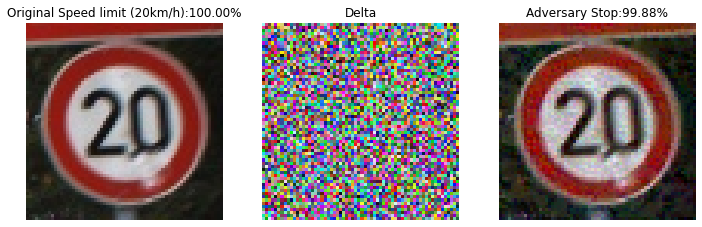

14
*** 10 ***
step: 50, loss: -36.239654541015625...


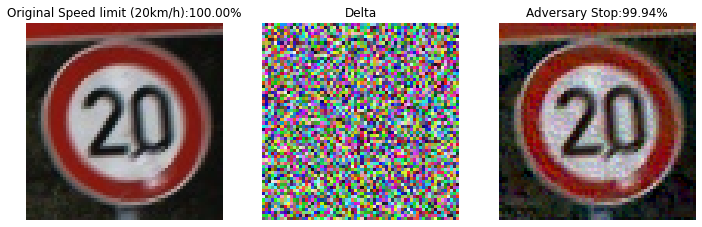

14
*** 11 ***
step: 50, loss: -58.42859649658203...


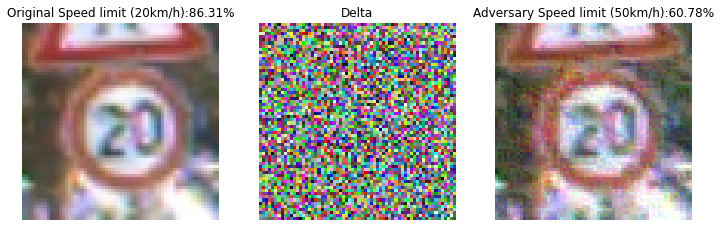

2
*** 12 ***
step: 50, loss: -52.262210845947266...


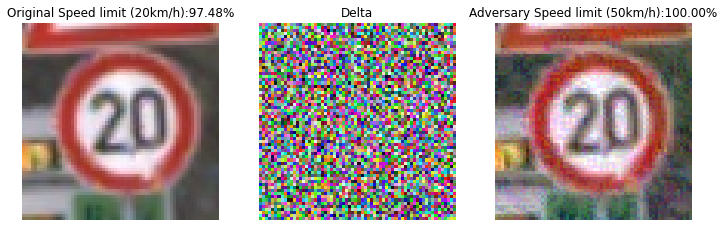

2
*** 13 ***
step: 50, loss: -65.15567779541016...


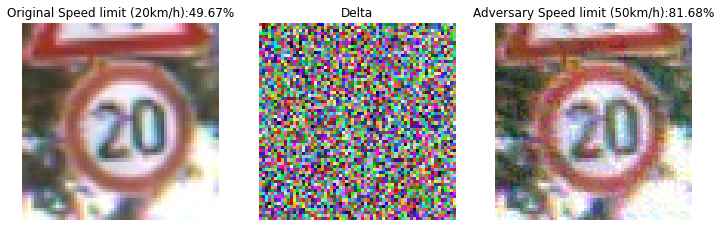

2
*** 14 ***
step: 50, loss: -49.6363525390625...


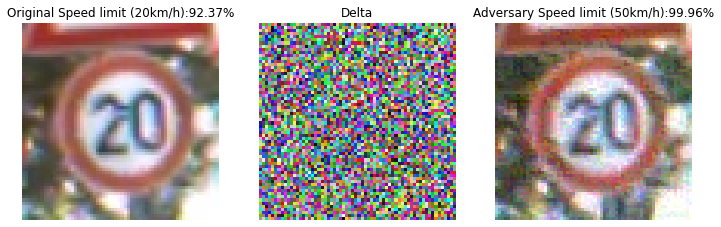

2
*** 15 ***
step: 50, loss: -76.46221923828125...


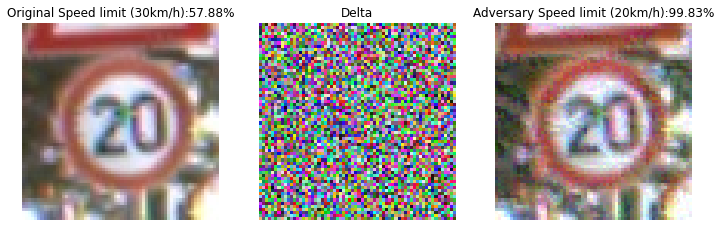

0
*** 16 ***
step: 50, loss: -68.0604476928711...


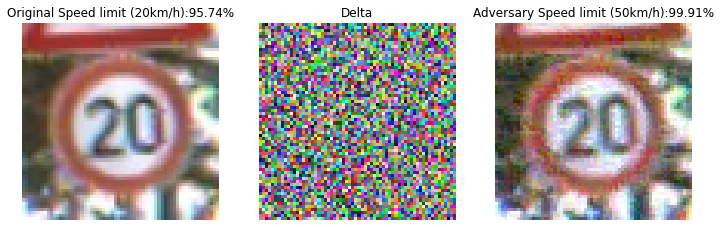

2
*** 17 ***
step: 50, loss: -64.74345397949219...


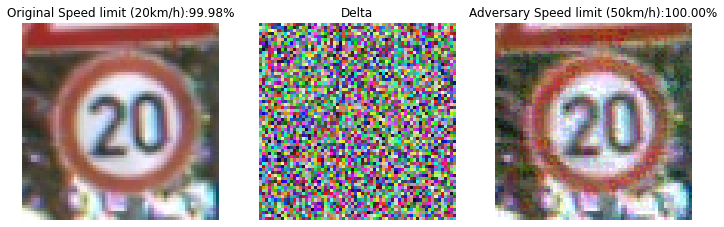

2
*** 18 ***
step: 50, loss: -67.56268310546875...


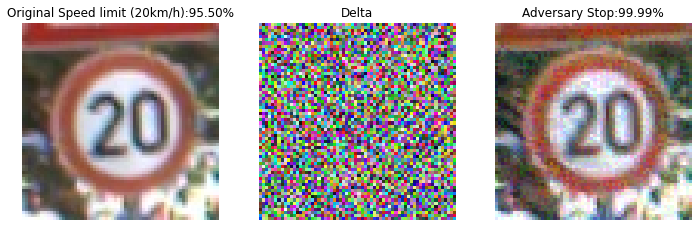

14
*** 19 ***
step: 50, loss: -55.83027648925781...


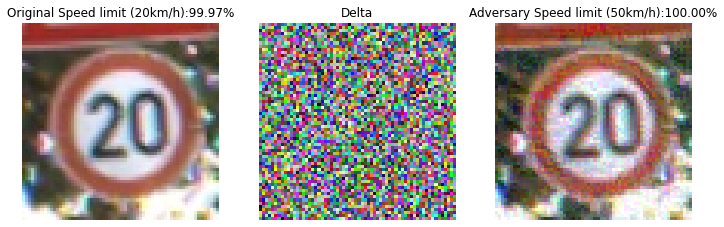

2
*** 20 ***
step: 50, loss: -63.74375534057617...


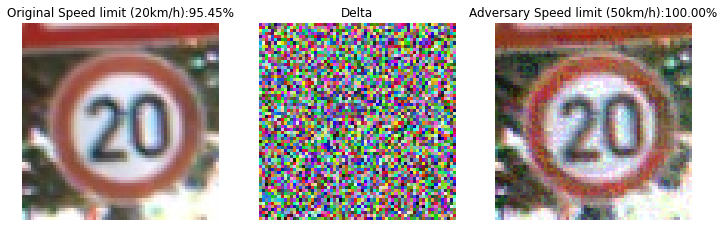

2
*** 21 ***
step: 50, loss: -71.02110290527344...


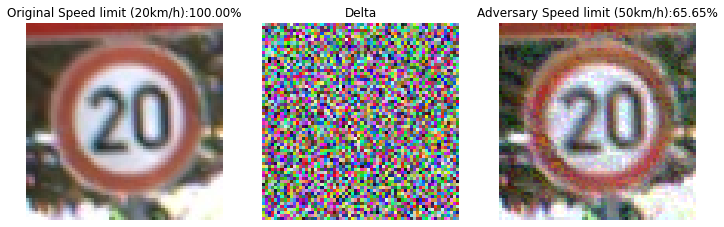

2
*** 22 ***
step: 50, loss: -56.330474853515625...


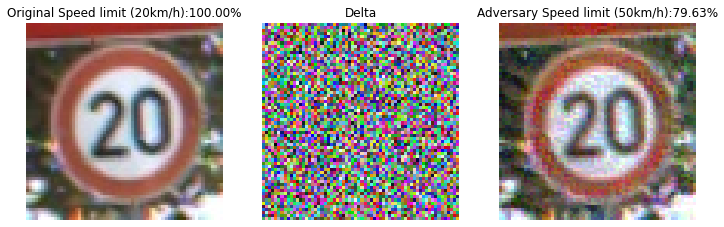

2
*** 23 ***
step: 50, loss: -78.88691711425781...


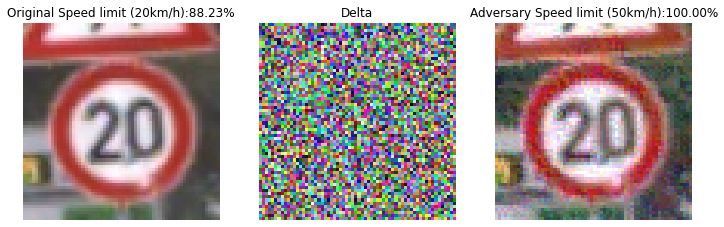

2
*** 24 ***
step: 50, loss: -71.44515228271484...


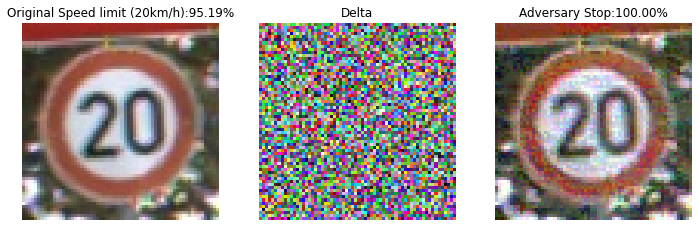

14
*** 25 ***
step: 50, loss: -74.64911651611328...


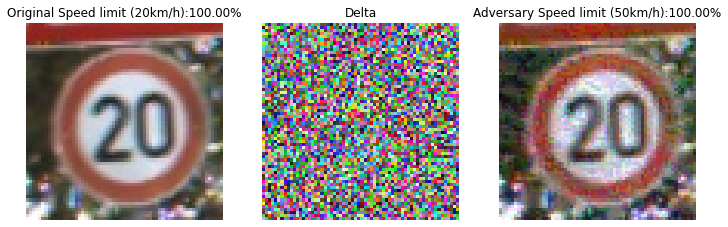

2
*** 26 ***
step: 50, loss: -72.10025787353516...


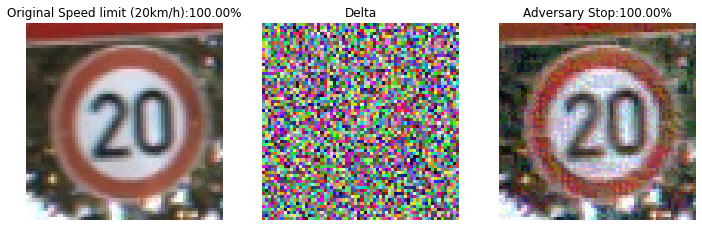

14
*** 27 ***
step: 50, loss: -73.34355163574219...


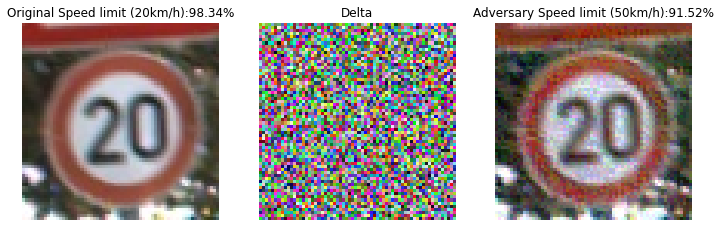

2
*** 28 ***
step: 50, loss: -91.87937927246094...


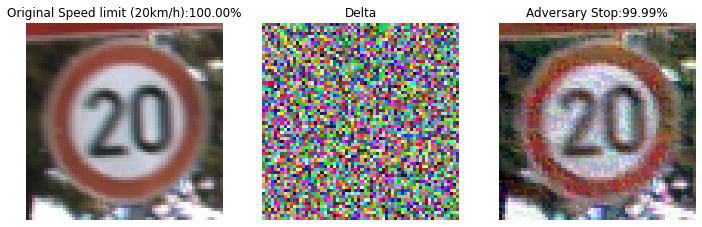

14
*** 29 ***
step: 50, loss: -92.73635864257812...


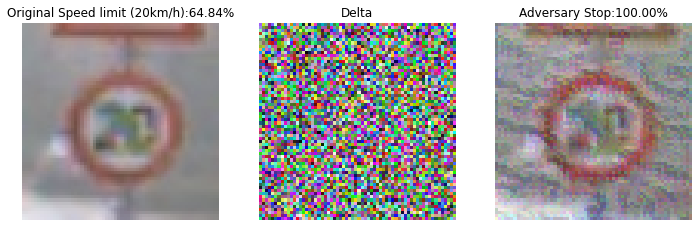

14
*** 30 ***
step: 50, loss: -102.0831527709961...


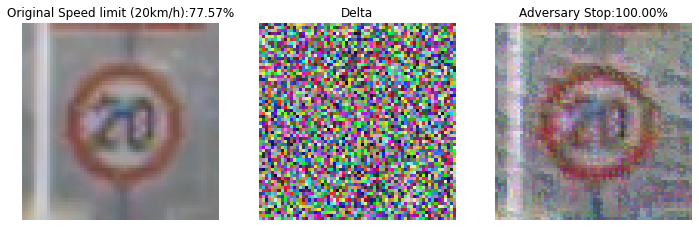

14
*** 31 ***
step: 50, loss: -109.73209381103516...


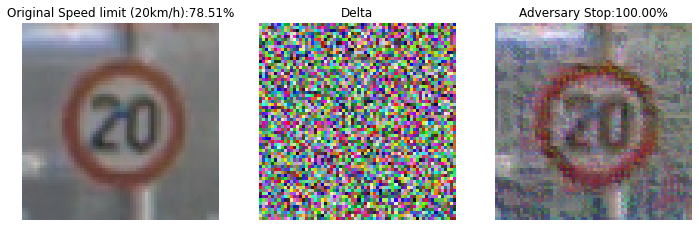

14
*** 32 ***
step: 50, loss: -115.90147399902344...


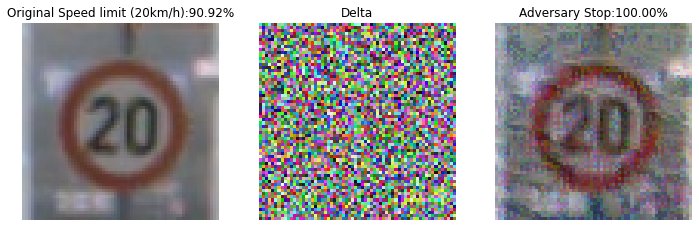

14
*** 33 ***
step: 50, loss: -107.291259765625...


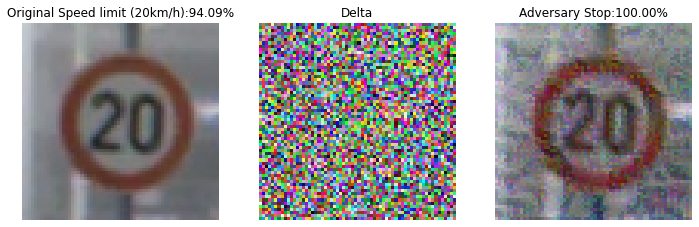

14
*** 34 ***
step: 50, loss: -73.44389343261719...


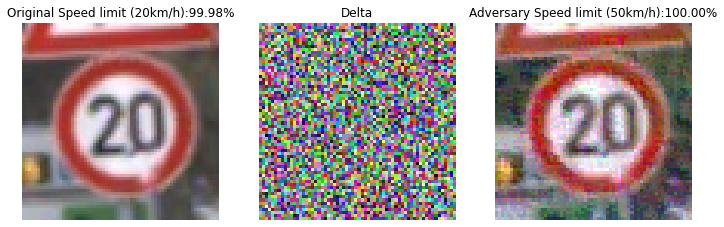

2
*** 35 ***
step: 50, loss: -99.84326171875...


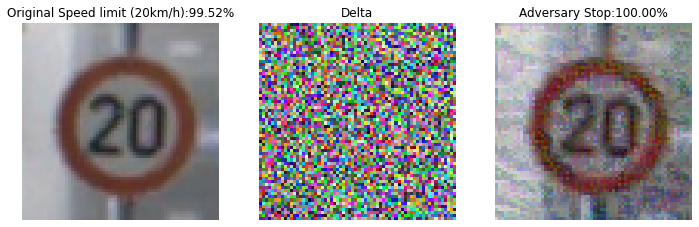

14
*** 36 ***
step: 50, loss: -105.94161987304688...


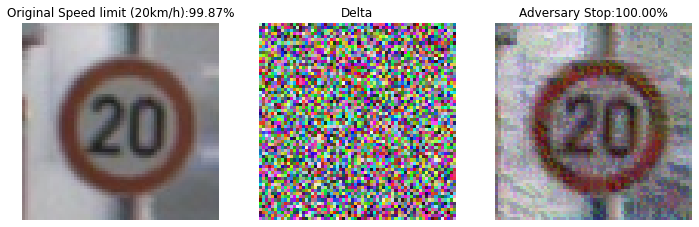

14
*** 37 ***
step: 50, loss: -114.8187255859375...


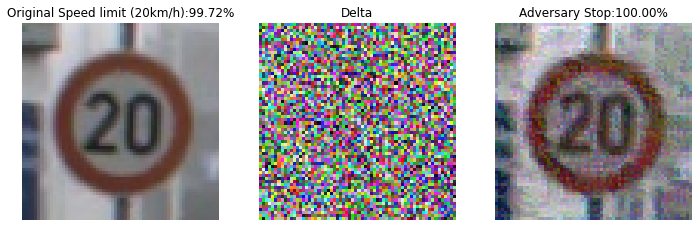

14
*** 38 ***
step: 50, loss: -112.06404113769531...


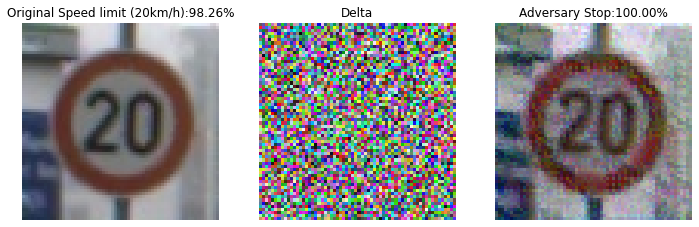

14
*** 39 ***
step: 50, loss: -114.53773498535156...


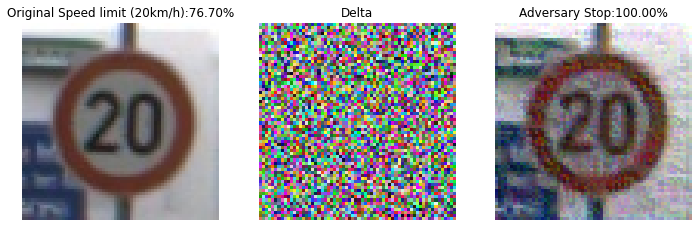

14
*** 40 ***
step: 50, loss: -99.37393188476562...


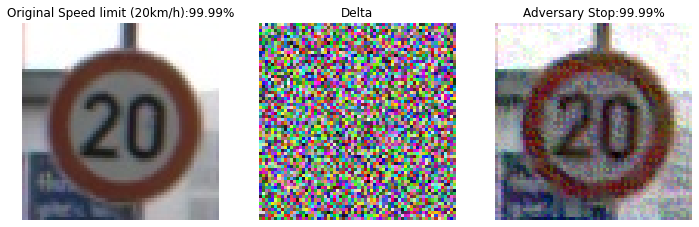

14
*** 41 ***
step: 50, loss: -114.12112426757812...


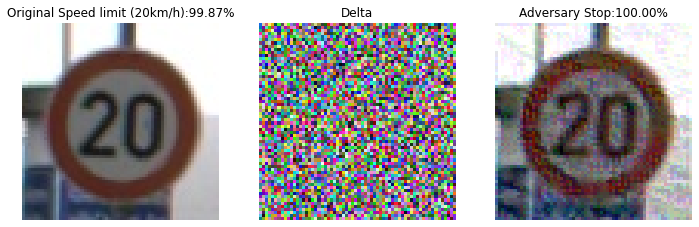

14
*** 42 ***
step: 50, loss: -129.71424865722656...


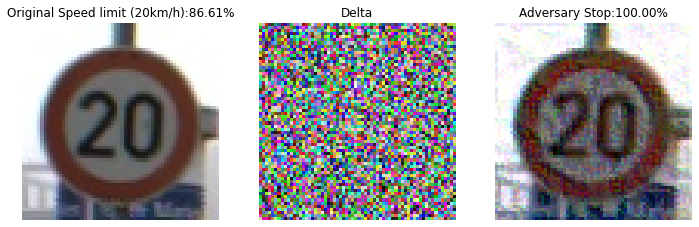

14
*** 43 ***
step: 50, loss: -128.1719970703125...


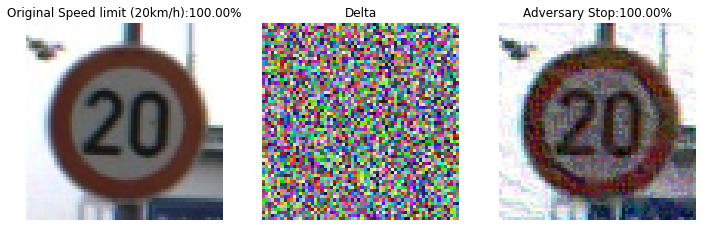

14
*** 44 ***
step: 50, loss: -121.98949432373047...


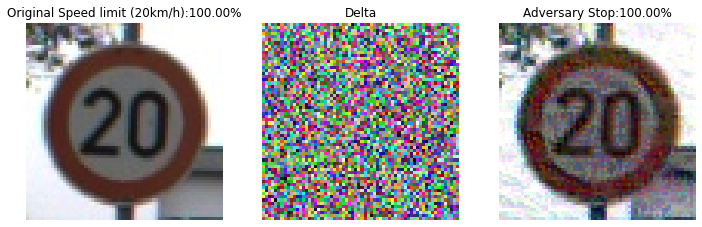

14
*** 45 ***
step: 50, loss: -77.80632019042969...


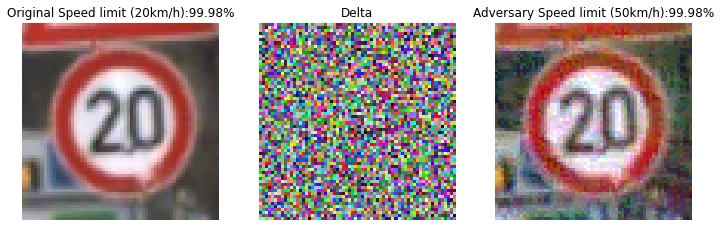

2
*** 46 ***
step: 50, loss: -137.460693359375...


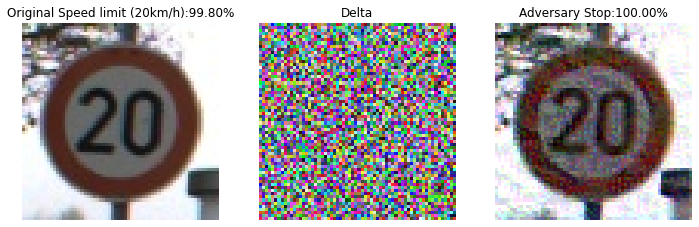

14
*** 47 ***
step: 50, loss: -110.68539428710938...


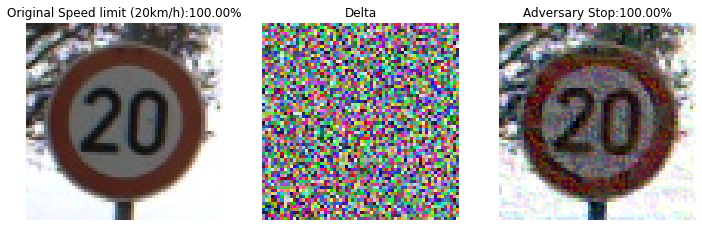

14
*** 48 ***
step: 50, loss: -136.54232788085938...


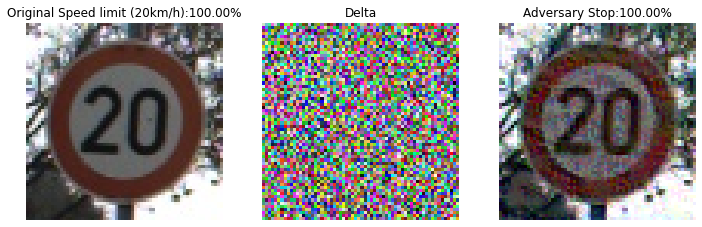

14
*** 49 ***
step: 50, loss: -144.13226318359375...


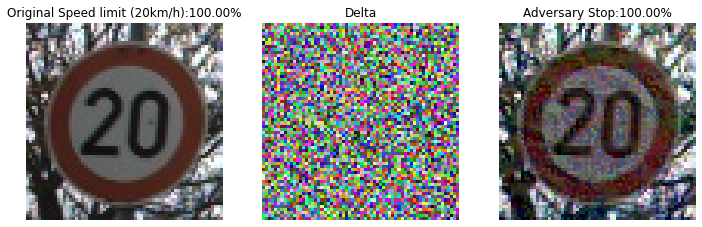

14
*** 50 ***
step: 50, loss: -107.24635314941406...


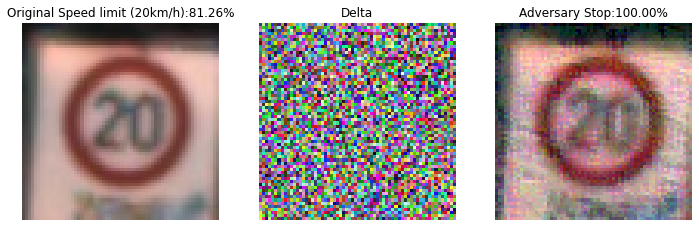

14
*** 51 ***
step: 50, loss: -112.07746887207031...


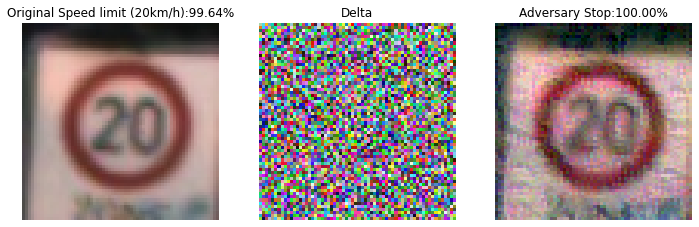

14
*** 52 ***
step: 50, loss: -111.31784057617188...


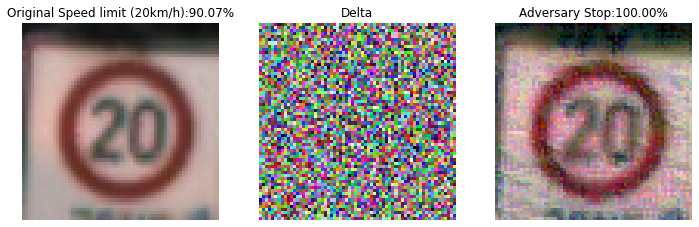

14
*** 53 ***
step: 50, loss: -110.12213134765625...


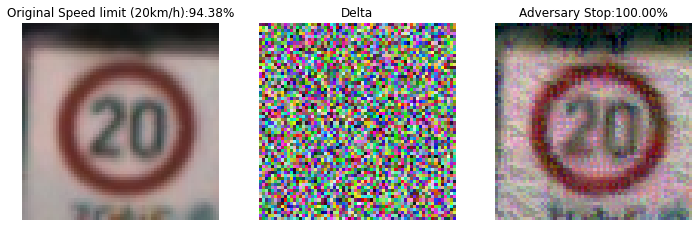

14
*** 54 ***
step: 50, loss: -109.90988159179688...


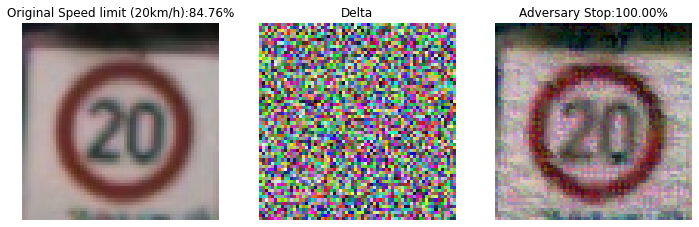

14
*** 55 ***
step: 50, loss: -108.3570785522461...


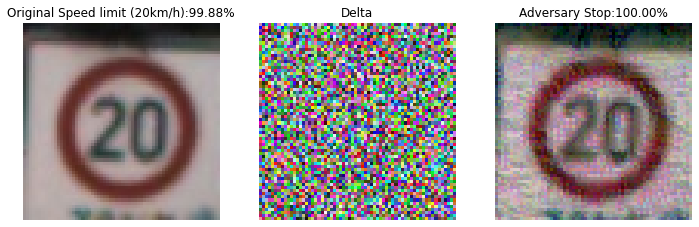

14
*** 56 ***
step: 50, loss: -76.6619873046875...


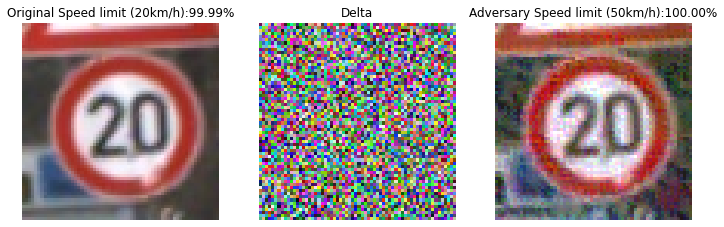

2
*** 57 ***
step: 50, loss: -100.49490356445312...


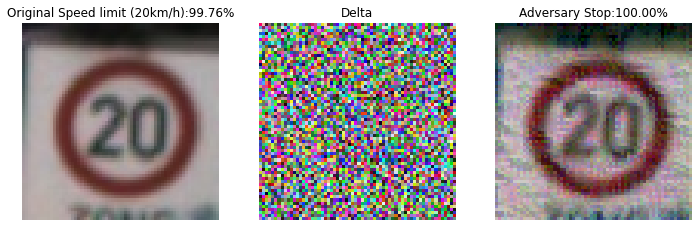

14
*** 58 ***
step: 50, loss: -107.88761901855469...


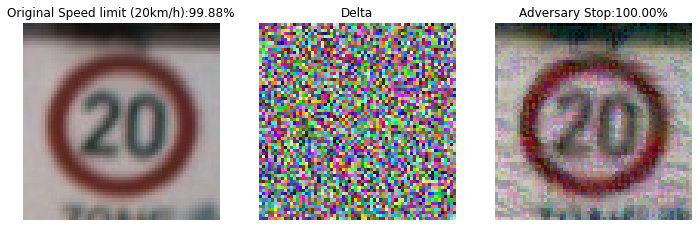

14
*** 59 ***
step: 50, loss: -110.42036437988281...


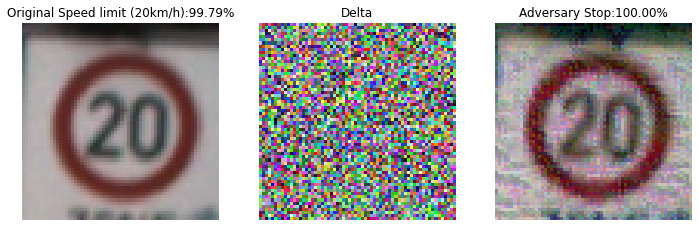

14
*** 60 ***
step: 50, loss: -102.60064697265625...


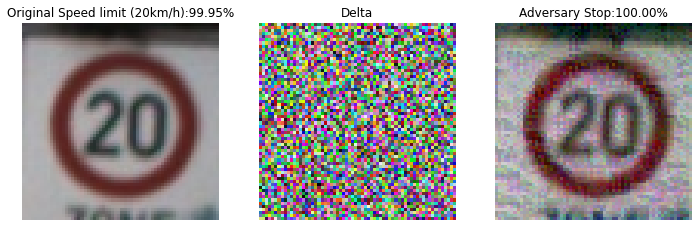

14
*** 61 ***
step: 50, loss: -101.45883178710938...


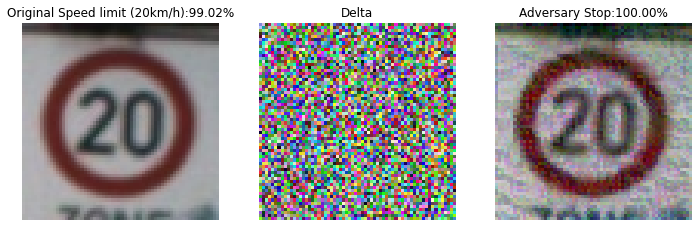

14
*** 62 ***
step: 50, loss: -102.66099548339844...


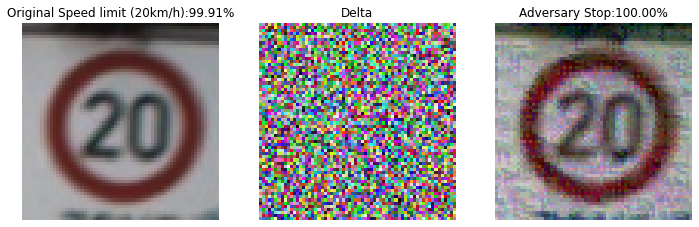

14
*** 63 ***
step: 50, loss: -99.88734436035156...


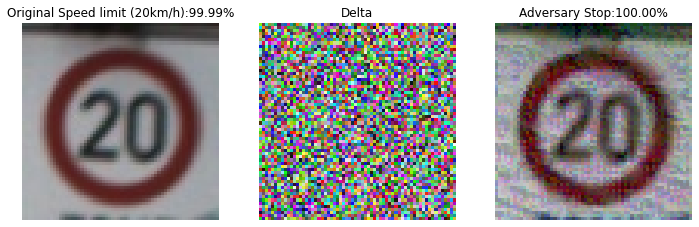

14
*** 64 ***
step: 50, loss: -95.9566421508789...


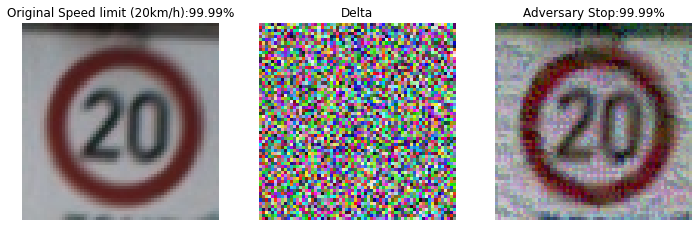

14
*** 65 ***
step: 50, loss: -93.89717102050781...


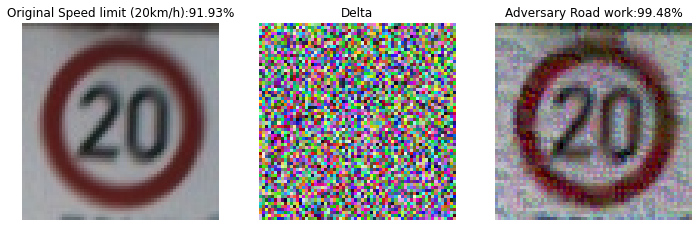

25
*** 66 ***
step: 50, loss: -100.0561752319336...


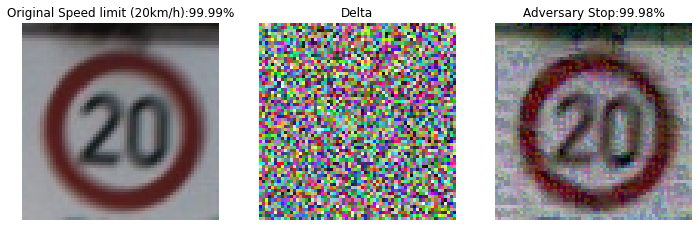

14
*** 67 ***
step: 50, loss: -71.66506958007812...


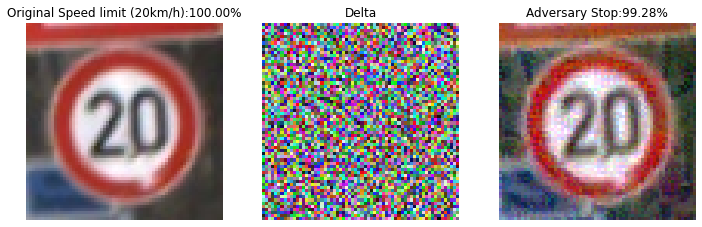

14
*** 68 ***
step: 50, loss: -101.43145751953125...


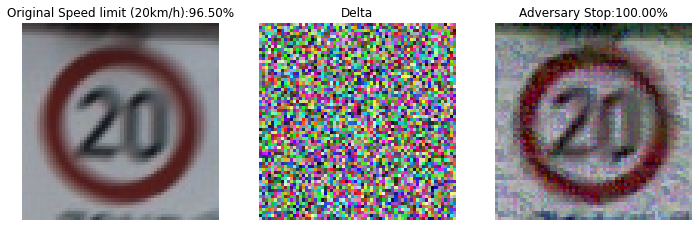

14
*** 69 ***
step: 50, loss: -104.555908203125...


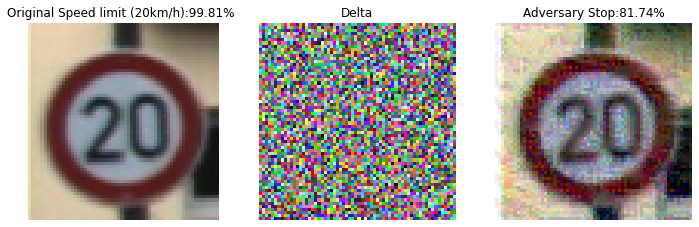

14
*** 70 ***
step: 50, loss: -89.53857421875...


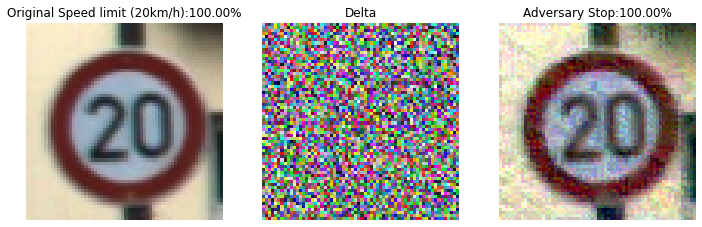

14
*** 71 ***
step: 50, loss: -87.94564819335938...


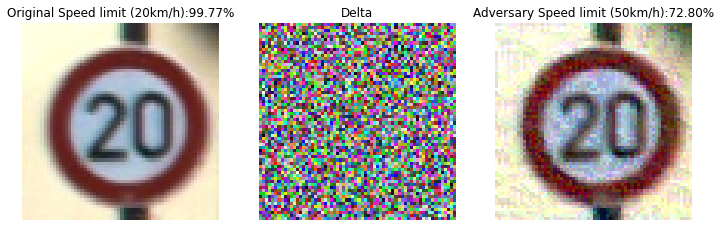

2
*** 72 ***
step: 50, loss: -81.1116714477539...


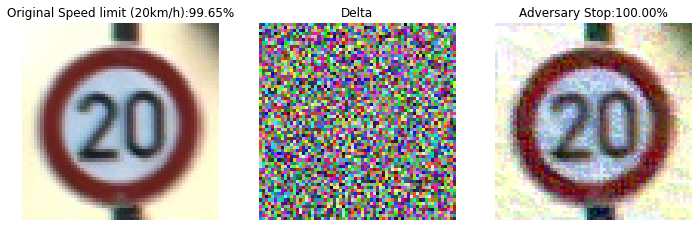

14
*** 73 ***
step: 50, loss: -85.89360809326172...


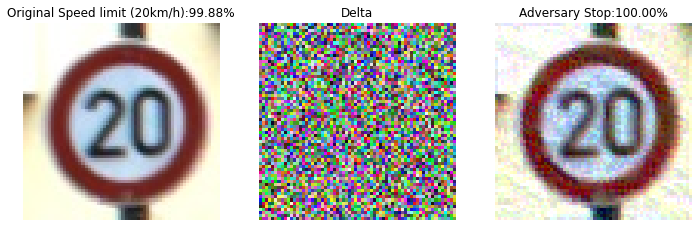

14
*** 74 ***
step: 50, loss: -78.31367492675781...


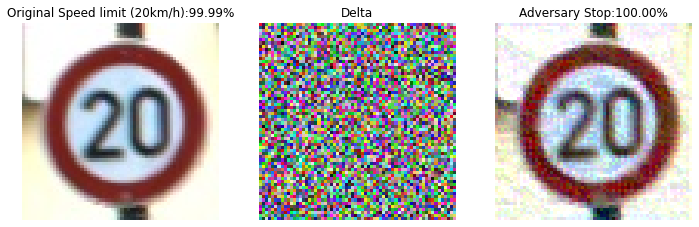

14
*** 75 ***
step: 50, loss: -64.00304412841797...


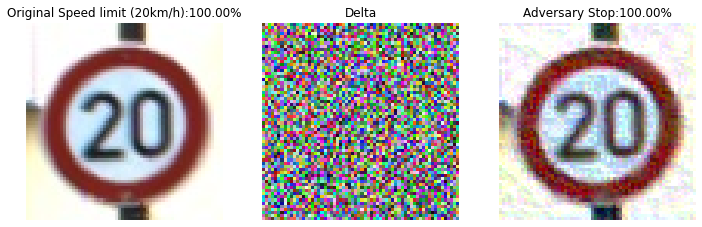

14
*** 76 ***
step: 50, loss: -86.98025512695312...


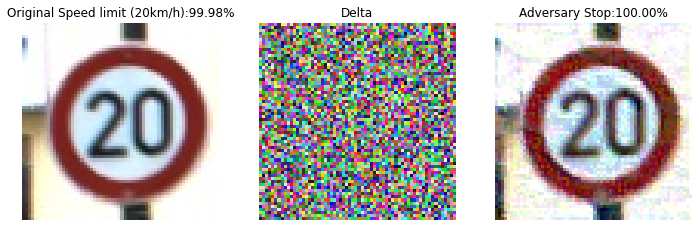

14
*** 77 ***
step: 50, loss: -81.00086975097656...


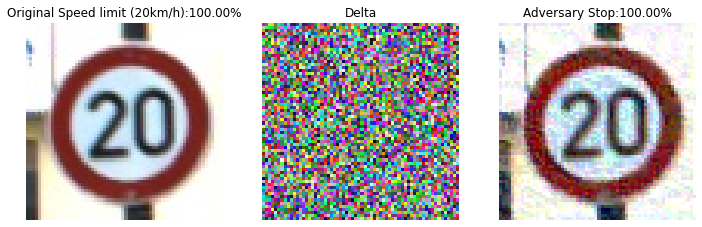

14
*** 78 ***
step: 50, loss: -78.12861633300781...


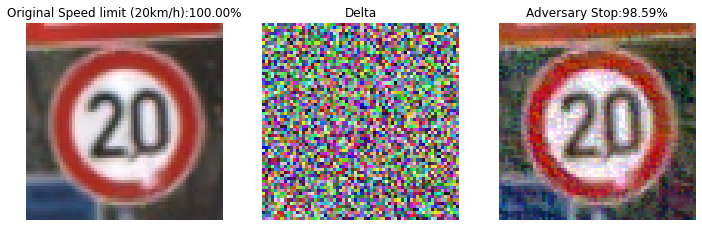

14
*** 79 ***
step: 50, loss: -72.12215423583984...


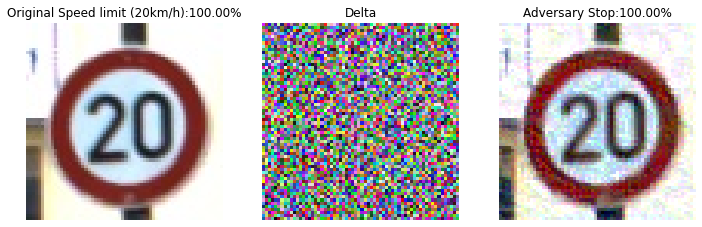

14
*** 80 ***
step: 50, loss: -73.38165283203125...


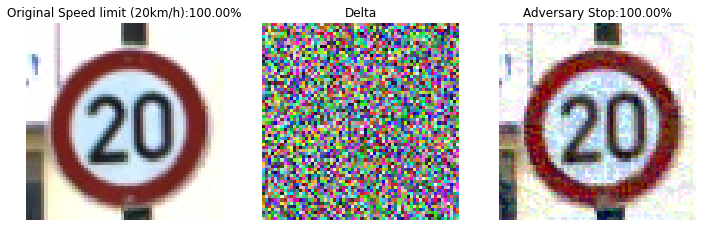

14
*** 81 ***
step: 50, loss: -73.8997802734375...


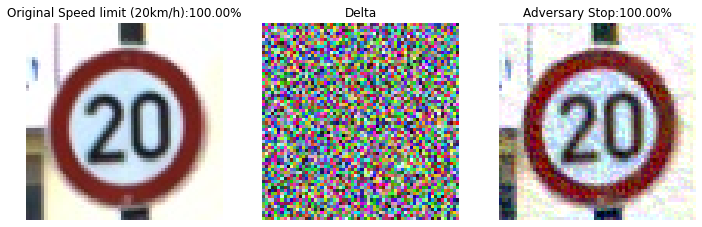

14
*** 82 ***
step: 50, loss: -77.028076171875...


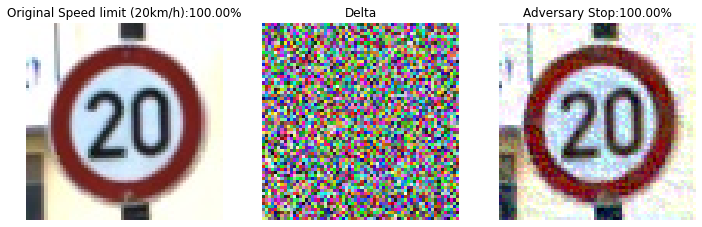

14
*** 83 ***
step: 50, loss: -70.47235870361328...


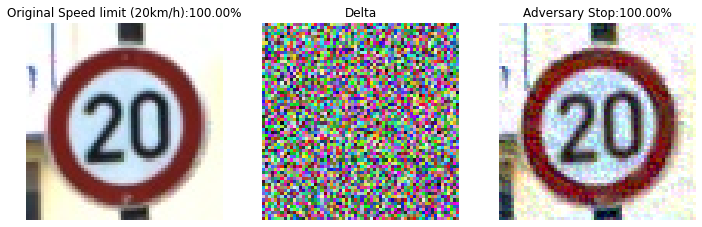

14
*** 84 ***
step: 50, loss: -78.93406677246094...


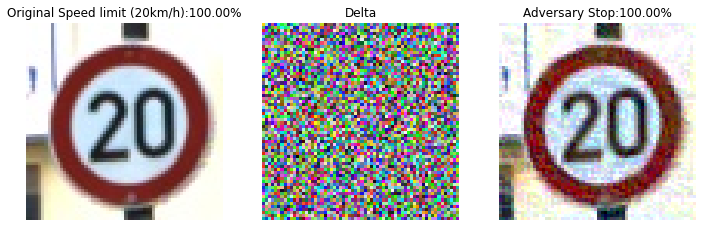

14
*** 85 ***
step: 50, loss: -81.17718505859375...


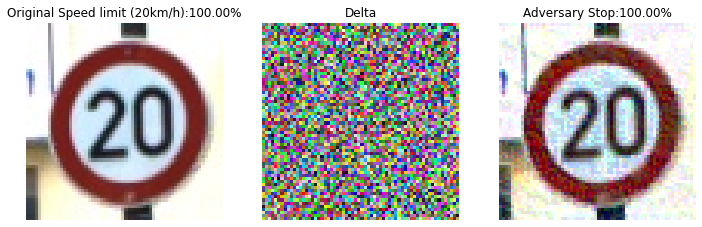

14
*** 86 ***
step: 50, loss: -76.68962860107422...


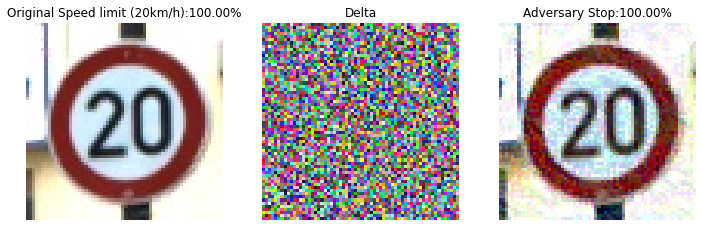

14
*** 87 ***
step: 50, loss: -73.23823547363281...


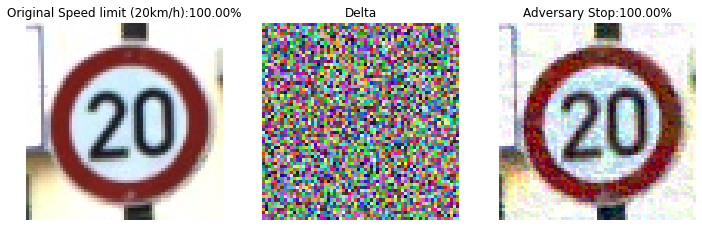

14
*** 88 ***
step: 50, loss: -65.38418579101562...


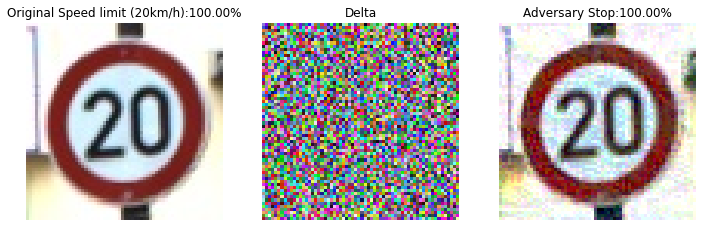

14
*** 89 ***
step: 50, loss: -75.9322738647461...


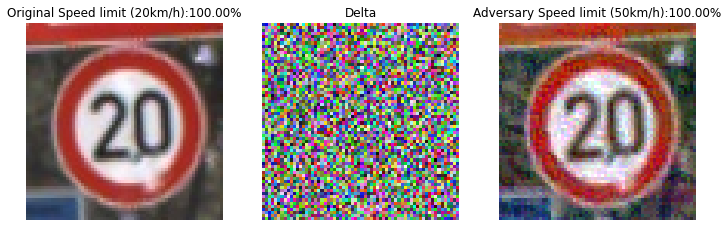

2
*** 90 ***
step: 50, loss: -66.68434143066406...


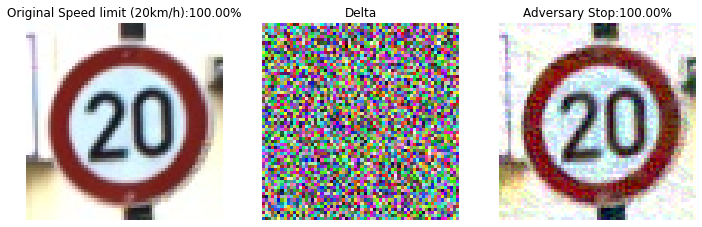

14
*** 91 ***
step: 50, loss: -70.6671142578125...


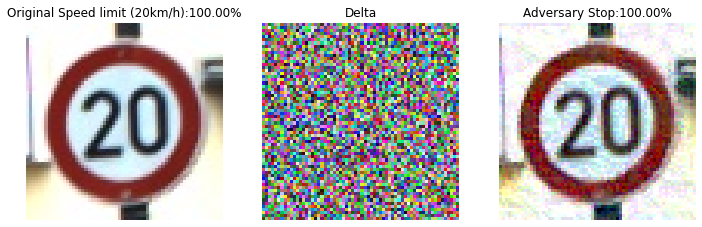

14
*** 92 ***
step: 50, loss: -71.46612548828125...


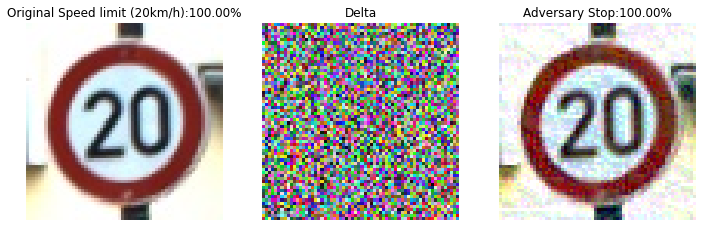

14
*** 93 ***
step: 50, loss: -68.34056091308594...


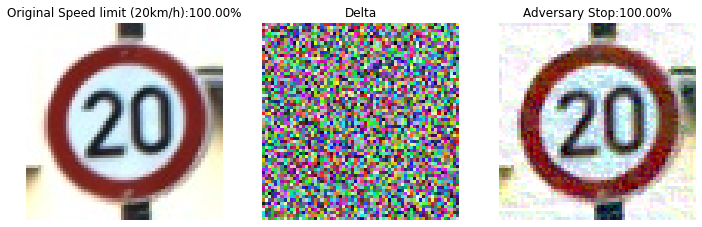

14
*** 94 ***
step: 50, loss: -65.66587829589844...


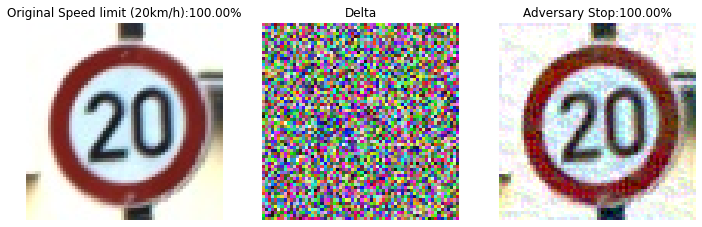

14
*** 95 ***
step: 50, loss: -62.45842361450195...


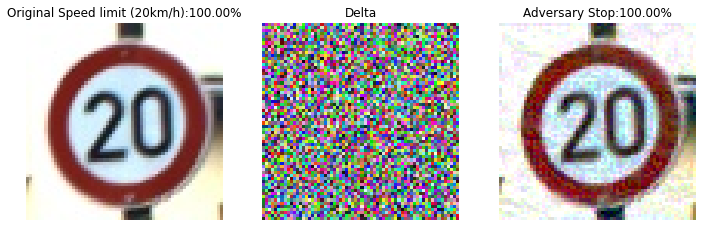

14
*** 96 ***
step: 50, loss: -75.32292175292969...


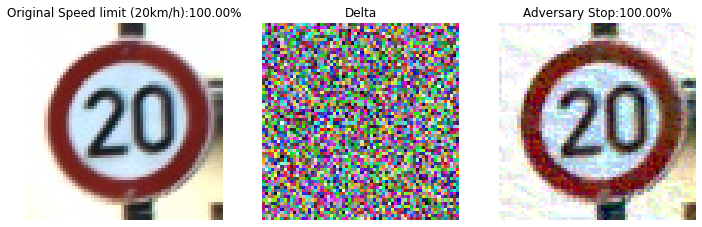

14
*** 97 ***
step: 50, loss: -69.50108337402344...


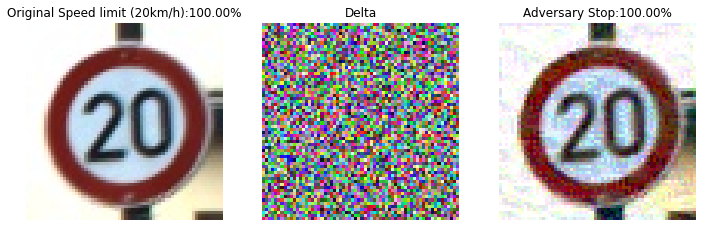

14
*** 98 ***
step: 50, loss: -74.13774108886719...


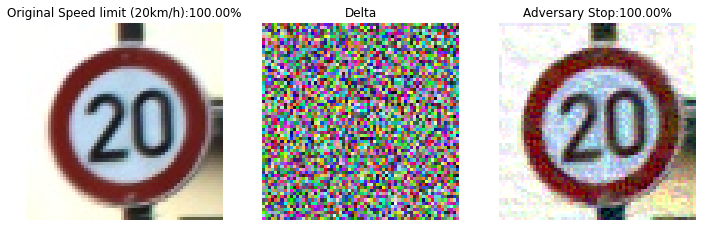

14
*** 99 ***
step: 50, loss: -74.63176727294922...


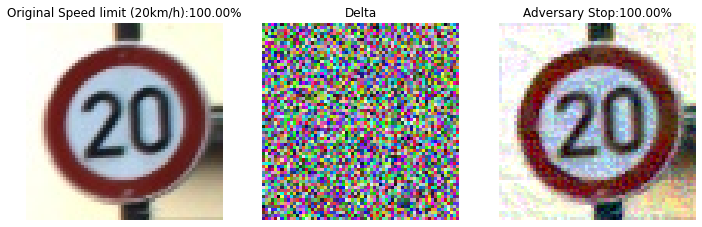

14
Done
STOPS:  76
SPEED LIMIT 20 km/h:  2
OTHER CLASSES:  22


In [9]:
steps = 51
stops = 0;
speed_limit_20 = 0
for i in range(samples.shape[0]): 
    print("***", i, "***")
    image = cv2.cvtColor(samples[i], cv2.COLOR_BGR2RGB)
    image = np.expand_dims(image, axis=0)
    baseImage =tf.constant(image, dtype=tf.float32) 
    delta = tf.Variable(tf.zeros_like(baseImage), trainable=True)
    for step in range(0, steps):
        max = pred[i].argmax()
        real_class = max
        delta,loss = do_step(baseImage, delta, real_class)
        #if step % 50 ==0:
        if step == 50:
            label_index = show_step(delta,loss, pred[i])
            
    print(label_index)
    if label_index == 14:
        stops = stops + 1;
    if label_index == 0:
        speed_limit_20 = speed_limit_20 + 1
print("Done")
print("STOPS: ", stops)
print("SPEED LIMIT 20 km/h: ", speed_limit_20)
print("OTHER CLASSES: ", 100 - stops - speed_limit_20)